In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1WstTasrMjtOvEtLoX9Zei9_7cFU9WckN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ANZ synthesised transaction dataset.xlsx')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [6]:
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [7]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [8]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


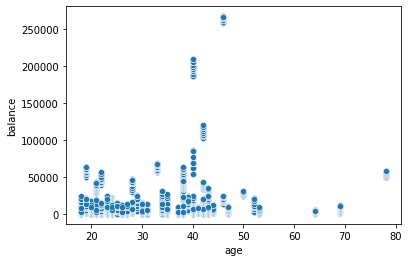

In [9]:
sns.scatterplot(x=data['age'],y=data['balance'],data=data)

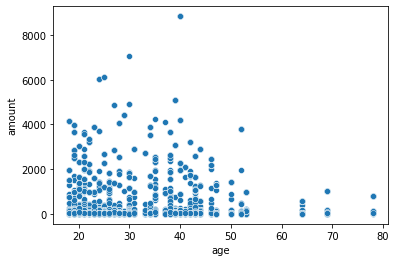

In [10]:
sns.scatterplot(x=data['age'],y=data['amount'],data=data)

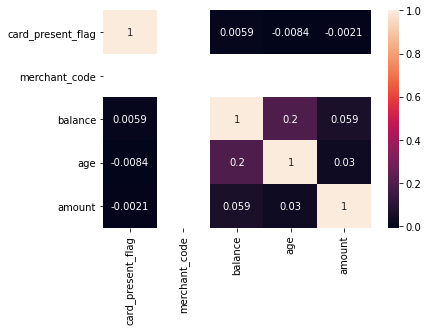

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data.isnull().any()

status               False
card_present_flag     True
bpay_biller_code      True
account              False
currency             False
long_lat             False
txn_description      False
merchant_id           True
merchant_code         True
first_name           False
balance              False
date                 False
gender               False
age                  False
merchant_suburb       True
merchant_state        True
extraction           False
amount               False
transaction_id       False
country              False
customer_id          False
merchant_long_lat     True
movement             False
dtype: bool

In [13]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [14]:
#@title Default title text
x=data[['age','amount']]
y=data['balance']

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred1=lr.predict(x_train)
y_pred2=lr.predict(x_test)

In [26]:

y_pred1

array([18185.87033202,  7033.76550911, 33611.72083612, ...,
       40710.17992759,  9524.53250185, 10743.19447528])